In [9]:
import os
import pandas as pd
import numpy as np
import pathlib
import pickle
import matplotlib.pyplot as plt
import copy

# parameters

In [10]:
SEED = 12
file_path = 'E:/robust_scheduling/SEED='+str(SEED)+'/'
with open(file_path + 'para_info.pkl','rb') as tf:
    para = pickle.load(tf)
delta_mu = para['delta_mu'] # control lb of mean processing time
delta_r = para['delta_r'] # control ub of the release time
delta_ep = para['delta_ep'] # control the upper bound of the mad
delta_er = para['delta_er'] # control the upper bound of the mad
S_train = para['S_train']
S_test = para['S_test']
iterations = para['iterations']
instances = para['instances']
range_c = para['range_c']


In [11]:
def load_results(instances,file_path,file_name):
    rst_mean = np.zeros(instances)
    rst_75 = np.zeros(instances)
    rst_95 = np.zeros(instances)
    rst_time = np.zeros(instances)
    for ins in range(instances):
        full_path = file_path + 'ins='+str(ins)+'/'+ 'iteration='+str(0)+'/'
        # print(full_path)
        # deterministic results
        with open(full_path+file_name, "rb") as tf:
            sol = pickle.load(tf)
        rst_mean[ins] = np.mean(sol['out_obj'])
        rst_75[ins] = np.quantile(sol['out_obj'],0.75)
        rst_95[ins] = np.quantile(sol['out_obj'],0.95)
        rst_time[ins] = sol['time']
    rst = {}
    rst['avg'] = rst_mean
    rst['quan_75'] = rst_75
    rst['quan_95'] = rst_95
    rst['time'] = rst_time
    return rst


In [12]:
def load_wass_results(instances,range_c,file_path,file_name):
    len_c = len(range_c)
    avg = np.zeros((instances,len_c))
    quan75 = np.zeros((instances,len_c))
    quan95 = np.zeros((instances,len_c))
    time_arr = np.zeros((instances,len_c))

    index = 0
    for ins in range(instances):
        full_path = file_path + 'ins='+str(ins)+'/'+ 'iteration='+str(0)+'/'
        # print(full_path)
        # deterministic results
        if os.path.exists(full_path+file_name):
            with open(full_path+file_name, "rb") as tf:
                sol = pickle.load(tf)
            # print('ins',ins,'obj',sol['out_obj'].mean(axis=0).to_list())
            avg[index,:] = np.asarray(sol['out_obj'].mean(axis=0))
            quan75[index,:] = np.asarray(sol['out_obj'].quantile(axis = 0,q = 0.75))
            quan95[index,:] = np.asarray(sol['out_obj'].quantile(axis = 0,q = 0.95))
            time_arr[index] = sol['time']
            index = index + 1
    rst = {}
    rst['avg'] = avg[0:index,:]
    rst['quan_75'] = quan75[0:index,:]
    rst['quan_95'] = quan95[0:index,:]
    rst['time'] = time_arr[0:index,:]
    return rst

In [13]:
file_path

'E:/robust_scheduling/SEED=12/'

In [26]:

delta_er_all = np.arange(0.5,2.0,0.5)
delta_ep_all = np.arange(0.5,2.0,0.5)
delta_r_all = [0.05,0.15,0.3]
det_rst_all = {}
saa_rst_all = {}
wass_rst_all = {}
for delta_r in delta_r_all:
    det_rst = np.zeros((len(delta_er_all),len(delta_ep_all)))
    saa_rst = np.zeros((len(delta_er_all),len(delta_ep_all)))
    wass_rst = {}
    metric_name = 'quan_95'
    for i in range(len(delta_er_all)):
        delta_er = delta_er_all[i]
        for j in range(len(delta_ep_all)):
            delta_ep = delta_ep_all[j]
            print('delta_er=',delta_er,' delta_ep=',delta_ep)
            file_path1 = file_path + 'delta_r='+str(delta_r) + '/delta_er='+str(delta_er) + '/delta_ep='+str(delta_ep)+ '/'
            det_rst[i,j] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[metric_name])
            saa_rst[i,j] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[metric_name])
            wass_rst[i,j] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name],axis = 0)
    det_rst_all[delta_r] = det_rst
    saa_rst_all[delta_r] = saa_rst
    wass_rst_all[delta_r] = wass_rst

delta_er= 0.5  delta_ep= 0.5
delta_er= 0.5  delta_ep= 1.0
delta_er= 0.5  delta_ep= 1.5
delta_er= 1.0  delta_ep= 0.5
delta_er= 1.0  delta_ep= 1.0
delta_er= 1.0  delta_ep= 1.5
delta_er= 1.5  delta_ep= 0.5
delta_er= 1.5  delta_ep= 1.0
delta_er= 1.5  delta_ep= 1.5
delta_er= 0.5  delta_ep= 0.5
delta_er= 0.5  delta_ep= 1.0
delta_er= 0.5  delta_ep= 1.5
delta_er= 1.0  delta_ep= 0.5
delta_er= 1.0  delta_ep= 1.0
delta_er= 1.0  delta_ep= 1.5
delta_er= 1.5  delta_ep= 0.5
delta_er= 1.5  delta_ep= 1.0
delta_er= 1.5  delta_ep= 1.5
delta_er= 0.5  delta_ep= 0.5
delta_er= 0.5  delta_ep= 1.0
delta_er= 0.5  delta_ep= 1.5
delta_er= 1.0  delta_ep= 0.5
delta_er= 1.0  delta_ep= 1.0
delta_er= 1.0  delta_ep= 1.5
delta_er= 1.5  delta_ep= 0.5
delta_er= 1.5  delta_ep= 1.0
delta_er= 1.5  delta_ep= 1.5


In [27]:
saa_rst

array([[10171.21197626, 10878.05572013, 11454.53431888],
       [10239.80442653, 10894.43152203, 11465.73305996],
       [10282.14456351, 11030.7772908 , 11410.25215749]])

In [17]:
wass_rst

{(0,
  0): array([9492.07511476, 9489.78479069, 9520.43342434, 9559.22824366,
        9622.27515584, 9653.54118205, 9695.312311  , 9703.42233801,
        9703.42233801, 9703.42233801]),
 (0,
  1): array([9629.35610453, 9638.20017557, 9625.26220667, 9672.21169647,
        9691.78088487, 9735.15019839, 9857.26863037, 9912.05377609,
        9919.15095534, 9919.15095534]),
 (0,
  2): array([ 9811.47871074,  9793.48315883,  9814.3191929 ,  9839.74227896,
         9858.4342539 ,  9858.0773454 ,  9948.41521988, 10046.53892672,
        10114.53783433, 10133.82034701]),
 (1,
  0): array([9507.8597806 , 9520.80129535, 9535.52162544, 9586.54209492,
        9631.28751669, 9652.7276146 , 9701.4809175 , 9700.20737024,
        9700.20737024, 9700.20737024]),
 (1,
  1): array([9664.71315035, 9659.77041257, 9666.06436643, 9698.17496594,
        9741.00314176, 9769.89051227, 9959.82244116, 9994.60114894,
        9985.27162656, 9985.31818051]),
 (1,
  2): array([ 9798.85680263,  9792.1949125 ,  9790.0998

In [28]:
# compute ratio
ratio_all= {}
for delta_r in delta_r_all:
    
    saa_ratio = saa_rst_all[delta_r]/det_rst_all[delta_r]
    rs_ratio = {}
    for i in range(len(delta_er_all)):
        delta_er = delta_er_all[i]
        for j in range(len(delta_ep_all)):
            delta_ep = delta_ep_all[j]
            rs_ratio[i,j] = wass_rst_all[delta_r][i,j]/det_rst_all[delta_r][i,j]

    ratio_set = {}
    ratio_set['saa'] = saa_ratio
    ratio_set['rs'] = rs_ratio
    ratio_all[delta_r] = ratio_set

In [29]:

file_path

'E:/robust_scheduling/SEED=12/'

In [30]:
with open(file_path+metric_name+'_ratio.pkl', "wb") as tf:
    pickle.dump(ratio_all,tf)

In [31]:
with open(file_path + 'avg_ratio.pkl','rb') as tf:
    ratio_avg_set_all = pickle.load(tf)

In [32]:
with open(file_path + 'quan_95_ratio.pkl','rb') as tf:
    ratio_pt_set_all = pickle.load(tf)

In [10]:
ratio_avg_set_all = {}
ratio_pt_set_all = {}
delta_r_all = [0.05,0.15,0.3]
for i in range(len(delta_r_all)):
    delta_r = delta_r_all[i]
    file_path1 = '/Users/zhangxun/data/robust_scheduling/rand_release/release_processing_var/S='+str(10)+'/delta_r='+str(delta_r)
    with open(file_path1 + '_avg_ratio.pkl','rb') as tf:
        rst = pickle.load(tf)
    ratio_avg_set_all[delta_r] = rst
    with open(file_path1 + '_pt_ratio.pkl','rb') as tf:
        rst = pickle.load(tf)
    ratio_pt_set_all[delta_r] = rst

In [60]:
ratio_pt_set_all[0.3]['saa']

array([[0.97761231, 0.98596709, 0.98431813],
       [0.90505216, 0.93642787, 0.93495178],
       [0.79998185, 0.87172777, 0.85349321]])

In [58]:
ratio_avg_set_all[0.3]['saa']

array([[0.98127569, 0.97980045, 0.97336113],
       [0.9448326 , 0.94894789, 0.94168211],
       [0.88892487, 0.91204369, 0.89664184]])

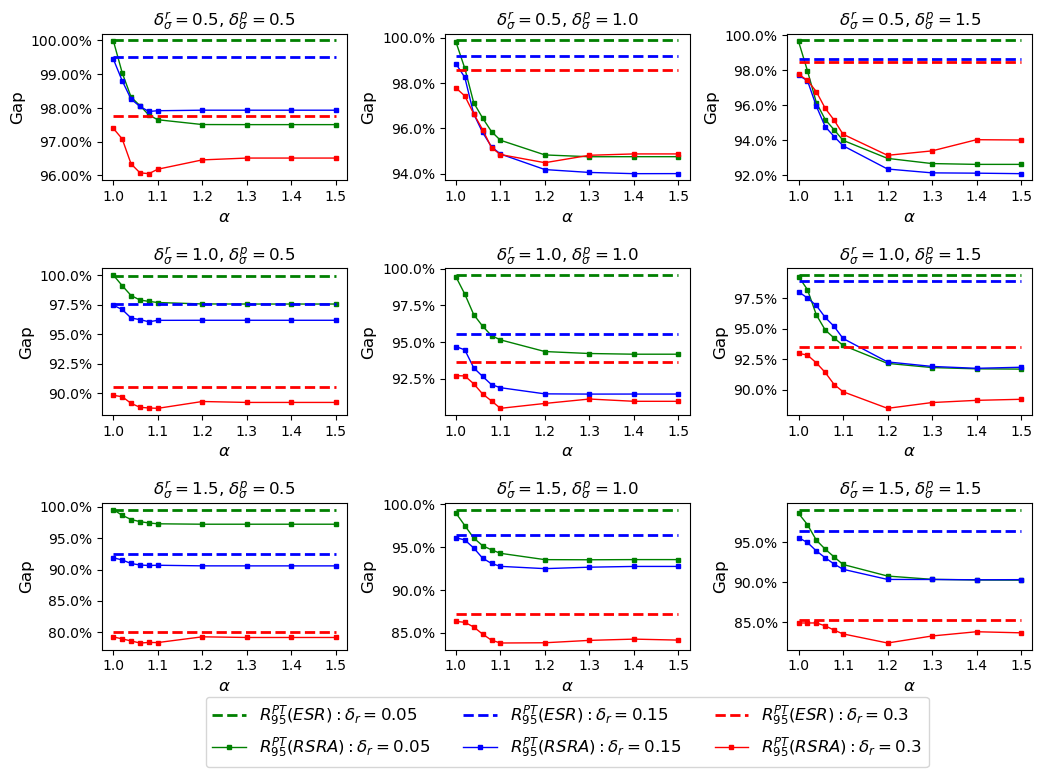

In [43]:
import matplotlib.ticker as mtick
ms = 3
lw = 1
ticks = np.arange(1,1.501,0.1)
metric_name = 'quan_95'
color_set = ['g','b','r']
delta_er_all = np.arange(0.5,1.51,0.5)
delta_ep_all = np.arange(0.5,1.51,0.5)
fig,ax = plt.subplots(len(delta_er_all),len(delta_ep_all),figsize=(12, 8))
index = 0 
for i in range(len(delta_er_all)):
    delta_er = delta_er_all[i]
    for j in range(len(delta_ep_all)):
        # ax[i,j].plot(range_c,np.ones(len(range_c)),'-.',color = 'k',linewidth = lw)
        if metric_name == 'avg':
            for k in range(len(delta_r_all)):
                delta_r = delta_r_all[k]
                name1 = r'$R_{A}(ESR):\delta_r='+str(delta_r)+'$'
                name2 = r'$R_{A}(RSRA):\delta_r='+str(delta_r)+'$'
                ax[i,j].plot(range_c,np.ones(len(range_c))*ratio_avg_set_all[delta_r]['saa'][i,j],'--',color = color_set[k],markersize=ms,linewidth = 2,label=name1)
                ax[i,j].plot(range_c,ratio_avg_set_all[delta_r]['rs'][i,j],'-s',color = color_set[k],markersize=ms,linewidth = lw,label=name2)
                ax[i,j].yaxis.set_major_formatter(mtick.PercentFormatter(1))
        else:
            for k in range(len(delta_r_all)):
                delta_r = delta_r_all[k]
                name1 = r'$R^{PT}_{95}(ESR):\delta_r='+str(delta_r)+'$'
                name2 = r'$R^{PT}_{95}(RSRA):\delta_r='+str(delta_r)+'$'
                ax[i,j].plot(range_c,np.ones(len(range_c))*ratio_pt_set_all[delta_r]['saa'][i,j],'--',color = color_set[k],markersize=ms,linewidth = 2,label=name1)
                ax[i,j].plot(range_c,ratio_pt_set_all[delta_r]['rs'][i,j],'-s',color = color_set[k],markersize=ms,linewidth = lw,label=name2)
                ax[i,j].yaxis.set_major_formatter(mtick.PercentFormatter(1))

        ax[i,j].set_ylabel('Gap',fontsize = 12)
        ax[i,j].set_xlabel(r'$\alpha$',fontsize = 12)
        # ax[i,j].set_yticks(np.arange(0.88,1.01,0.04))
        ax[i,j].set_xticks(ticks)
        ax[i,j].set_title(r'$\delta^{r}_{\sigma}=$'+str(delta_er)+r', $\delta^{p}_{\sigma}=$'+str(delta_ep_all[j]))
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# ax.legend(loc='upper left',fontsize = 18) 
plt.legend(loc=8,fontsize = 12, ncol = 3, bbox_to_anchor=(-0.9,-0.8),borderaxespad = 0.)     ##设置ax4中legend的位置，将其放在图外
fig_name = 'Out-of-sample performance-'+metric_name+'.pdf'
plt.subplots_adjust(wspace =0.4, hspace =0.6)#调整子图间距
plt.savefig(file_path + fig_name, bbox_inches='tight') # 保存成PDF放大后不失真（默认保存在了当前文件夹下）
plt.show()


In [13]:
def obtain_results(delta_all,name,file_path,file_pre,range_c,instances):
    rst_det = np.zeros(len(delta_all))
    rst_saa = np.zeros(len(delta_all))
    # rst_mom = np.zeros((len(delta_all),instances))
    # rst_wass_exact = {}
    rst_wass = np.zeros((len(delta_all),len(range_c)))
    for i in range(len(delta_all)):
        delta = delta_all[i]
        
        file_path1 = file_path+file_pre +str(delta) +'/'
        # print(file_path1)
        # print('det',np.mean(load_results(instances,file_path1,'sol_det.pkl')[name]))
        # print('saa',np.mean(load_results(instances,file_path1,'sol_saa.pkl')[name]))
        # print('wass',np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[name],axis = 0))

        rst_det[i] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[name])
        rst_saa[i] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[name])
        rst_wass[i,:] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[name],axis = 0)
        # print('i',i)
    return rst_det,rst_saa,rst_wass

In [14]:
def obtain_ratio(delta_ep_all,range_c,rst_det,rst_saa,rst_wass):
    wass_mat = np.zeros((len(delta_ep_all),len(range_c)))
    for i in range(len(delta_ep_all)):
        # print('----------------delta_ep=',delta_ep_all[i],'------------------')
        # print('saa ratio=',rst_saa[i]/rst_det[i])
        wass_mat[i,:] = rst_wass[i,:]/rst_det[i]
        # print('wass ratio=',rst_wass[i,:]/rst_det[i])
    out_df = pd.DataFrame(data=wass_mat,columns=range_c)
    out_df['SAA'] = rst_saa/rst_det

    return out_df

# Impact of number of jobs

In [15]:
range_c = np.asarray([0])

In [5]:
def obtain_avg(range_c,N_all,metric_name):
    det_rst = np.zeros(len(N_all))
    saa_rst = np.zeros(len(N_all))
    RS_rst = np.zeros(len(N_all))
    for i in range(len(N_all)):
        print('-------- n = ',N_all[i],' ---------')
        file_path1 = file_path + 'n='+str(N_all[i]) + '/'
        det_rst[i] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[metric_name])
        saa_rst[i] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[metric_name])
        RS_rst[i] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name],axis = 0)
    return det_rst, saa_rst, RS_rst

In [6]:
N_all = [10,20,30,40,50,60,70,80]
metric_name = 'avg'
det_rst_avg, saa_rst_avg, RS_rst_avg = obtain_avg(range_c,N_all,metric_name)

metric_name = 'quan_95'
det_rst_quan95, saa_rst_quan95, RS_rst_quan95 = obtain_avg(range_c,N_all,metric_name)


-------- n =  10  ---------
-------- n =  20  ---------
-------- n =  30  ---------
-------- n =  40  ---------
-------- n =  50  ---------
-------- n =  60  ---------
-------- n =  70  ---------
-------- n =  80  ---------
-------- n =  10  ---------
-------- n =  20  ---------
-------- n =  30  ---------
-------- n =  40  ---------
-------- n =  50  ---------
-------- n =  60  ---------
-------- n =  70  ---------
-------- n =  80  ---------


In [7]:
RS_rst_quan95

array([  2814.21748915,  10220.9853936 ,  22055.80635159,  38685.1660831 ,
        60432.8002613 ,  85474.89723666, 115217.47810964, 150345.43881704])

In [8]:
saa_rst_quan95/det_rst_quan95

array([1.        , 0.99319554, 0.96078065, 0.99291895, 0.97026076,
       0.95211086, 0.94906867, 0.95965055])

In [9]:
rst_df = pd.DataFrame()
rst_df['ratio_saa_avg'] = saa_rst_avg/det_rst_avg
rst_df['ratio_affine_avg'] = RS_rst_avg/det_rst_avg

rst_df['ratio_saa_quan95'] = saa_rst_quan95/det_rst_quan95
rst_df['ratio_affine_quan95'] = RS_rst_quan95/det_rst_quan95


In [10]:
rst_df

,ratio_saa_avg,ratio_affine_avg,ratio_saa_quan95,ratio_affine_quan95
0,1.000000,1.002615,1.000000,0.940084
1,0.988379,0.995092,0.993196,0.951825
2,0.971547,0.975889,0.960781,0.927803
3,0.989099,0.996519,0.992919,0.957727
4,0.974782,0.982391,0.970261,0.946937
5,0.958565,0.960475,0.952111,0.919712
6,0.961212,0.968388,0.949069,0.928152
7,0.971018,0.976564,0.959651,0.936377


In [11]:
pd.DataFrame(rst_df).to_csv( file_path +'tft_df.csv')

In [12]:
metric_name = 'time'
det_rst_time, saa_rst_time, RS_rst_time = obtain_avg(range_c,N_all,metric_name)


-------- n =  10  ---------
-------- n =  20  ---------
-------- n =  30  ---------
-------- n =  40  ---------
-------- n =  50  ---------
-------- n =  60  ---------
-------- n =  70  ---------
-------- n =  80  ---------


In [13]:
det_rst_time

array([0.01204016, 0.01192658, 0.0207515 , 0.06746228, 0.06291676,
       0.10365961, 0.25229559, 0.27436662])

In [14]:
time_df = pd.DataFrame()
time_df['det'] = det_rst_time
time_df['saa'] = saa_rst_time
time_df['RS'] = RS_rst_time


In [15]:
time_df

,det,saa,RS
0,0.012040,0.014939,0.540671
1,0.011927,0.043017,8.049967
2,0.020752,0.257977,54.341991
3,0.067462,0.553828,172.121580
4,0.062917,1.232301,605.572434
5,0.103660,2.559098,1232.840699
6,0.252296,4.518236,2370.399984
7,0.274367,6.884564,3478.682915


In [16]:
pd.DataFrame(time_df).to_csv( file_path +'time_df.csv')

In [17]:
det_time = pd.DataFrame()
saa_time = pd.DataFrame()
RS_time = pd.DataFrame()
metric_name = 'time'
for i in range(len(N_all)):
    print('-------- n = ',N_all[i],' ---------')
    file_path1 = file_path + 'n='+str(N_all[i]) + '/'
    det_time[N_all[i]] = load_results(instances,file_path1,'sol_det.pkl')[metric_name]
    saa_time[N_all[i]] = load_results(instances,file_path1,'sol_saa.pkl')[metric_name]
    rs_time_tem = load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name][:,0]
    rs_time = np.zeros(instances)
    rs_time[0:len(rs_time_tem)] = rs_time_tem
    RS_time[N_all[i]] = rs_time

-------- n =  10  ---------
-------- n =  20  ---------
-------- n =  30  ---------
-------- n =  40  ---------
-------- n =  50  ---------
-------- n =  60  ---------
-------- n =  70  ---------
-------- n =  80  ---------


In [18]:
RS_time

,10,20,30,40,50,60,70,80
0,0.827348,2.949353,54.892900,159.820848,275.193421,1001.272857,615.159625,9418.086170
1,0.727916,14.872627,51.896374,160.509448,274.329549,317.303725,852.190303,2062.970001
2,0.478657,3.729153,58.622522,121.093014,1073.284722,351.105212,2028.883702,4135.278154
3,0.537831,3.673024,47.769106,247.483733,347.117619,1498.287386,1200.907807,1172.315928
4,0.436703,12.875829,58.959676,208.707116,717.691590,629.904736,1416.330100,12379.232440
5,0.354192,9.737286,85.232314,279.094354,274.593345,1805.572563,4903.713680,819.082516
6,0.661583,5.911482,79.576944,152.617283,466.808244,1582.465395,1426.180588,1053.657444
7,0.400342,13.425918,24.558294,108.818114,930.516419,1375.604927,535.345642,1404.253435
8,0.378107,5.424963,43.966701,153.479511,867.897514,3171.964844,9284.210662,1117.864871
9,0.604028,7.900037,37.945085,129.592382,828.291918,594.925342,1441.077729,1224.088186


In [19]:
pd.DataFrame(det_time).to_csv( file_path +'time_det.csv')
pd.DataFrame(saa_time).to_csv( file_path +'time_saa.csv')
pd.DataFrame(RS_time).to_csv( file_path +'time_rs.csv')


# impact of correlation

In [5]:
def obtain_corre_rst(cov_bar_all,file_path,metric_name):
    det_rst = np.zeros(len(cov_bar_all))
    saa_rst = np.zeros(len(cov_bar_all))
    wass_rst = {}
    for i in range(len(cov_bar_all)):
        cov_bar = cov_bar_all[i]
        print('cov_bar=',cov_bar)
        file_path1 = file_path + 'cov_bar='+str(cov_bar) + '/'
        det_rst[i] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[metric_name])
        saa_rst[i] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[metric_name])
        wass_rst[i] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name],axis = 0)
    return det_rst,saa_rst,wass_rst

In [6]:
cov_bar_all = np.asarray([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
det_avg,saa_avg,wass_avg = obtain_corre_rst(cov_bar_all,file_path,'avg')
det_pt,saa_pt,wass_pt = obtain_corre_rst(cov_bar_all,file_path,'quan_95')


cov_bar= -0.6
cov_bar= -0.4
cov_bar= -0.2
cov_bar= 0.0
cov_bar= 0.2
cov_bar= 0.4
cov_bar= 0.6
cov_bar= -0.6
cov_bar= -0.4
cov_bar= -0.2
cov_bar= 0.0
cov_bar= 0.2
cov_bar= 0.4
cov_bar= 0.6


In [7]:
saa_ratio_avg = saa_avg/det_avg
saa_ratio_pt = saa_pt/det_pt

wass_raito_avg = np.zeros((len(cov_bar_all),len(range_c)))
wass_raito_pt = np.zeros((len(cov_bar_all),len(range_c)))

for i in range(len(cov_bar_all)):
    cov_bar = cov_bar_all[i]
    print('cov_bar=',cov_bar)
    wass_raito_avg[i,:] = wass_avg[i]/det_avg[i]
    wass_raito_pt[i,:] = wass_pt[i]/det_pt[i]

df_avg = pd.DataFrame(wass_raito_avg, columns=range_c)
df_avg['saa'] = saa_ratio_avg
df_pt = pd.DataFrame(wass_raito_pt, columns=range_c)
df_pt['saa'] = saa_ratio_pt

cov_bar= -0.6
cov_bar= -0.4
cov_bar= -0.2
cov_bar= 0.0
cov_bar= 0.2
cov_bar= 0.4
cov_bar= 0.6


In [8]:
df_avg

,1.000001,1.02,1.04,1.06,1.08,1.1,1.2,1.3,1.4,1.5,saa
0,0.987390,0.986993,0.989048,0.990182,0.994761,0.996258,1.002419,1.006570,1.006618,1.006618,0.983826
1,0.983029,0.982211,0.983491,0.986614,0.989280,0.991426,0.995584,0.997991,0.999172,0.999172,0.981651
2,0.976943,0.977514,0.979518,0.984181,0.987351,0.989545,0.996045,0.996471,0.998583,0.998583,0.978138
3,0.983242,0.982806,0.983915,0.986951,0.990739,0.993112,1.001494,1.003510,1.002912,1.002912,0.984086
4,0.984531,0.985527,0.985675,0.988846,0.992798,0.994671,0.999682,1.001824,1.003678,1.003774,0.986263
5,0.977721,0.977785,0.980726,0.983434,0.984932,0.989023,0.993818,0.994089,0.993782,0.993782,0.979432
6,0.972131,0.972672,0.973509,0.976636,0.980570,0.982252,0.991685,0.993348,0.991841,0.991841,0.974688


In [9]:
df_pt

,1.000001,1.02,1.04,1.06,1.08,1.1,1.2,1.3,1.4,1.5,saa
0,0.986003,0.988443,0.974994,0.964147,0.959278,0.954520,0.946909,0.948544,0.948271,0.948271,0.990872
1,0.981202,0.977786,0.966781,0.956636,0.952887,0.946824,0.940596,0.940430,0.942421,0.942421,0.986835
2,0.968845,0.964028,0.953069,0.944760,0.940427,0.936754,0.932017,0.931256,0.932599,0.932599,0.976355
3,0.980041,0.975134,0.965112,0.954822,0.949251,0.944199,0.938802,0.939644,0.938436,0.938436,0.987396
4,0.977663,0.973755,0.960132,0.952320,0.947849,0.943259,0.935685,0.936523,0.938494,0.938450,0.985136
5,0.974295,0.970314,0.956642,0.949421,0.942713,0.940510,0.933652,0.932367,0.932067,0.932067,0.980337
6,0.964714,0.960836,0.945395,0.935605,0.929008,0.924838,0.919520,0.920222,0.919011,0.919011,0.972469


In [10]:
pd.DataFrame(df_avg).to_csv(file_path +'df_avg.csv')
pd.DataFrame(df_pt).to_csv(file_path +'df_pt.csv')